<a href="https://colab.research.google.com/github/Soulfex/Deep_Learning/blob/main/3_Regresi%C3%B3n_lineal_con_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importamos liberias 

import os
# números aleatorios
import random

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# redes neuronales
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


from torch.utils.data import DataLoader, TensorDataset


## 3. Regresión lineal con PyTorch

Entrena y evalúa un modelo de regresión lineal para el conjunto de datos de calificaciones que considere los dos atributos de entrada

* Especificaciones: 
  - Grafica los datos en 3D.
  - Realiza la definición de la arquitectura usando tanto la interfaz de alto como la de medio nivel.
  - Prueba distintos valores para los hiperparámetros.
  - Realiza una predicción con tu modelo entrenado para la calificación que tendría un alumno si sabemos que estudió durante 12 horas para el examen y en un examen previo obtuvo 3 de calificación.
  -Discute las modificaciones que realizaste y las distintas configuraciones para los hiperparámetros que probaste.

In [2]:
# Datos
URL = 'https://raw.githubusercontent.com/gibranfp/CursoAprendizajeProfundo/2023-1/data/califs/califs.csv'
df = pd.read_csv(URL)
df.head(5)

,prev,horas,calif
0,5.6,8.2,5.1
1,6.7,9.3,5.9
2,5.1,10.0,5.4
3,5.7,10.4,6.5
4,7.1,10.4,6.7


In [3]:
def set_seed(seed=0):
    """Initializes pseudo-random number generators."""
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

### Grafica los datos en 3D


Exploremos los datos para determinar como se encuentran distribuidos 

In [4]:
# se obtienen los atributos de entrada (Calificación previa y horas de estudio)
x_trn = np.array(df.iloc[:,:2], dtype='float32')[..., np.newaxis]
# se obtiene la salida
y_trn = np.array(df.iloc[:,-1], dtype='float32')[..., np.newaxis]



Text(0.5, 0, 'Calificación')

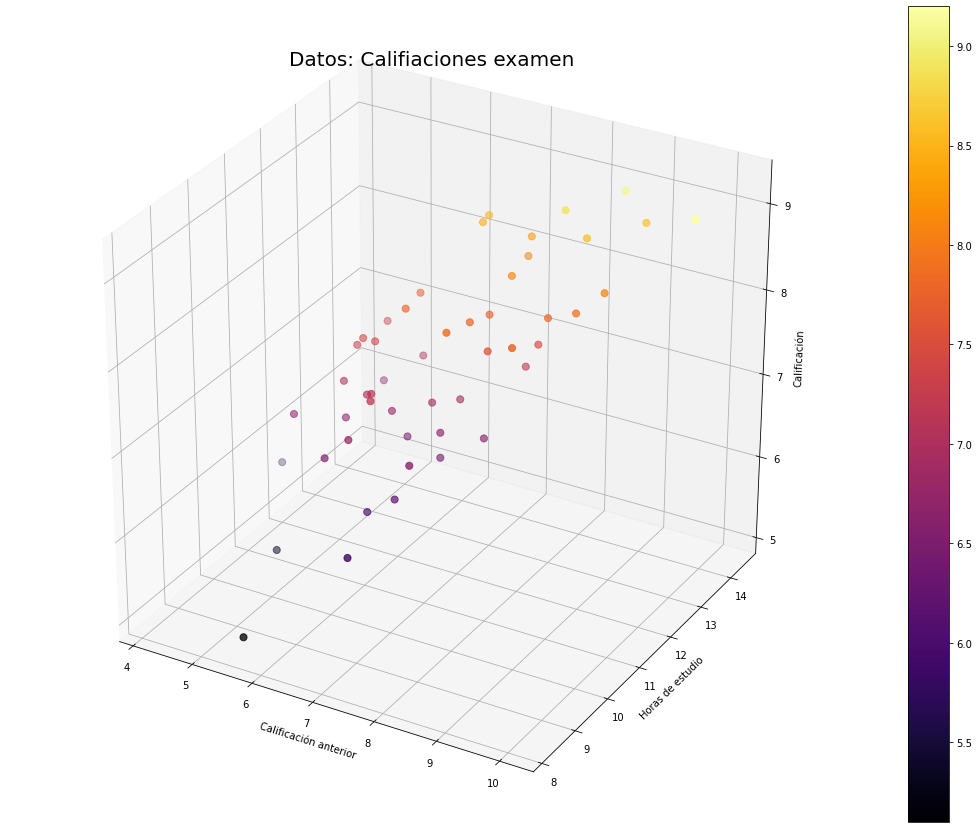

In [5]:
# graficamos
fig = plt.figure(figsize= (19, 15))
ax = plt.axes(projection='3d')


cbar = plt.colorbar(ax.scatter3D(x_trn[:, 0], x_trn[:, 1], y_trn[:,0], c = y_trn, cmap = 'inferno', s = 50))

plt.title("Datos: Califiaciones examen", fontsize = 20)
ax.set_xlabel('Calificación anterior')
ax.set_ylabel('Horas de estudio')
ax.set_zlabel('Calificación')


Visualizando la gráfica anterior podemos decir que efectivamente, existe una correlación entre las horas de estudio y las calificaciones

### Realiza la definición de la arquitectura usando tanto la interfaz de alto como la de medio nivel.

In [6]:
x_trn = np.array(df.iloc[:,:2], dtype="float32")
y_trn = np.array(df.iloc[:,-1], dtype="float32")[..., np.newaxis]

x_trn = torch.tensor(x_trn)
y_trn = torch.tensor(y_trn)

print(x_trn.shape)
print(y_trn.shape)

torch.Size([50, 2])
torch.Size([50, 1])


###  Conjunto de datos

<img src="https://raw.githubusercontent.com/gibranfp/CursoAprendizajeProfundo/29227f0ad9d952a2239a592a80a7990a085f43d7/figs/califs_tuberia.svg" width="1050"/>

In [7]:
ds = TensorDataset(x_trn, y_trn)

In [8]:
# Se crea el DataLoader

dl = DataLoader(ds, batch_size = 16, shuffle = True)

x, y = next(iter(dl))

print(f'x shape = {x.shape} dtyoe = {x.dtype}')
print(f'y shape={y.shape} dtype={y.dtype}')

x shape = torch.Size([16, 2]) dtyoe = torch.float32
y shape=torch.Size([16, 1]) dtype=torch.float32


### Modelo usando alto nivel

In [9]:
# API  de alto nivel
regLinealAlto = nn.Sequential(
    nn.Linear(2,1)
    )

print(regLinealAlto)

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
)


In [10]:
# Hacemos inferencia sobre el modelo utilizando datos sintéticos

x = torch.zeros(1,2)
y = regLinealAlto(x)
print(f'Entrada: {x.shape} => Salida: {y.shape}')

Entrada: torch.Size([1, 2]) => Salida: torch.Size([1, 1])


### Modelo usando medio nivel

In [11]:
# Se define una clase que va heredar de la clase padre nn.Module
class RegLinMedio(nn.Module):
    # Constuctor de la clase
    def __init__(self):
        # Constructor de la clase padre
        super(RegLinMedio, self).__init__()
        # Se definen las capas como atributos de la clase
        self.fc = nn.Linear(2, 1)

    # método para inferencia
    def forward(self, x):
        # definición de arquitectura 
        return self.fc(x)


  # Vamos a instanciar a la clase RegLinMedio

modelMedio = RegLinMedio()
modelMedio

RegLinMedio(
  (fc): Linear(in_features=2, out_features=1, bias=True)
)

Podemos ver que tanto la API de alto nivel como la de medio nivel son consistentes.

In [12]:

y2 = modelMedio(x)
print(f'Entrada: {x.shape} => Salida: {y.shape}')

Entrada: torch.Size([1, 2]) => Salida: torch.Size([1, 1])


### Prueba distintos valores para los hiperparámetros.

#### Variando hiperparametros usando alto nivel


In [13]:
# Definimos los hiperparametros que vamos a utilizar 

batch_sizes = [8, 16, 32]
learning_rates = [0.001,0.0001, 0.00001]
epochs = [20, 35, 50, 100]



In [14]:
loss_hists = [] # En esta lista se guardaran los historiales de perdida para cada caso

for batch_i in batch_sizes:
  print("Usando un batch_size de " + str(batch_i))

  for lr_i in learning_rates:
    print("Usando un learning rate de: " + str(lr_i))
    
    for e_i in epochs:
      print("Usando un valor de épocas: " + str(e_i))

      # Creamos el dataset
      ds = TensorDataset(x_trn, y_trn)

      # Se crea el DataLoader

      dl = DataLoader(ds, batch_size = batch_i, shuffle = True)

      #Entrenamiento

      # historial
      loss_hist = []

      # Modelo
      regLinealAlto = nn.Sequential(
    nn.Linear(2,1)
    )
      
      opt = optim.SGD(regLinealAlto.parameters(), lr= lr_i)
      for epoch in range(e_i):
        
        # entrenamiento de una época
        for x, y_true in dl:
            # hacemos inferencia para obtener los logits
            y_lgts = regLinealAlto(x)
            # calculamos de pérdida
            loss = F.mse_loss(y_lgts, y_true)
            # vaciamos los gradientes
            opt.zero_grad()
            # retropropagamos
            loss.backward()
            # actulizamos parámetros
            opt.step()

            # guardamos historial de pérdida
        loss_hist.append(loss.item() * 100)


        loss = np.mean(loss_hist)
        print(f'E{epoch:02} loss=[{loss:6.2f}]')
        
      loss_hists.append(loss_hist)                   
        # imprimimos la pérdida de la época
        
      
      





      
      #print(batch_i,lr_i,e_i)


Usando un batch_size de 8
Usando un learning rate de: 0.001
Usando un valor de épocas: 20
E00 loss=[ 40.28]
E01 loss=[ 30.73]
E02 loss=[ 26.04]
E03 loss=[ 34.25]
E04 loss=[ 34.04]
E05 loss=[ 28.90]
E06 loss=[ 29.24]
E07 loss=[ 30.29]
E08 loss=[ 28.01]
E09 loss=[ 29.13]
E10 loss=[ 27.00]
E11 loss=[ 26.14]
E12 loss=[ 24.34]
E13 loss=[ 24.61]
E14 loss=[ 24.49]
E15 loss=[ 26.49]
E16 loss=[ 25.62]
E17 loss=[ 25.29]
E18 loss=[ 25.38]
E19 loss=[ 25.60]
Usando un valor de épocas: 35
E00 loss=[ 41.70]
E01 loss=[ 24.50]
E02 loss=[ 24.65]
E03 loss=[ 25.22]
E04 loss=[ 27.38]
E05 loss=[ 25.08]
E06 loss=[ 26.80]
E07 loss=[ 25.92]
E08 loss=[ 25.42]
E09 loss=[ 23.76]
E10 loss=[ 23.66]
E11 loss=[ 23.57]
E12 loss=[ 23.11]
E13 loss=[ 22.27]
E14 loss=[ 21.26]
E15 loss=[ 20.22]
E16 loss=[ 19.45]
E17 loss=[ 18.72]
E18 loss=[ 19.22]
E19 loss=[ 20.63]
E20 loss=[ 20.68]
E21 loss=[ 20.85]
E22 loss=[ 21.57]
E23 loss=[ 21.24]
E24 loss=[ 20.88]
E25 loss=[ 20.41]
E26 loss=[ 20.32]
E27 loss=[ 21.22]
E28 loss=[ 21.27

In [15]:
len(loss_hists)

36

In [16]:
tittles = []
for batch_i in batch_sizes:
  #print("Usando un batch_size de " + str(batch_i))

  for lr_i in learning_rates:
    #print("Usando un learning rate de: " + str(lr_i))
    
    for e_i in epochs:

      tittles.append("BZ: " + str(batch_i) + " LR = "+ str(lr_i) + " E: " + str(e_i))

In [17]:
tittles[0]

'BZ: 8 LR = 0.001 E: 20'

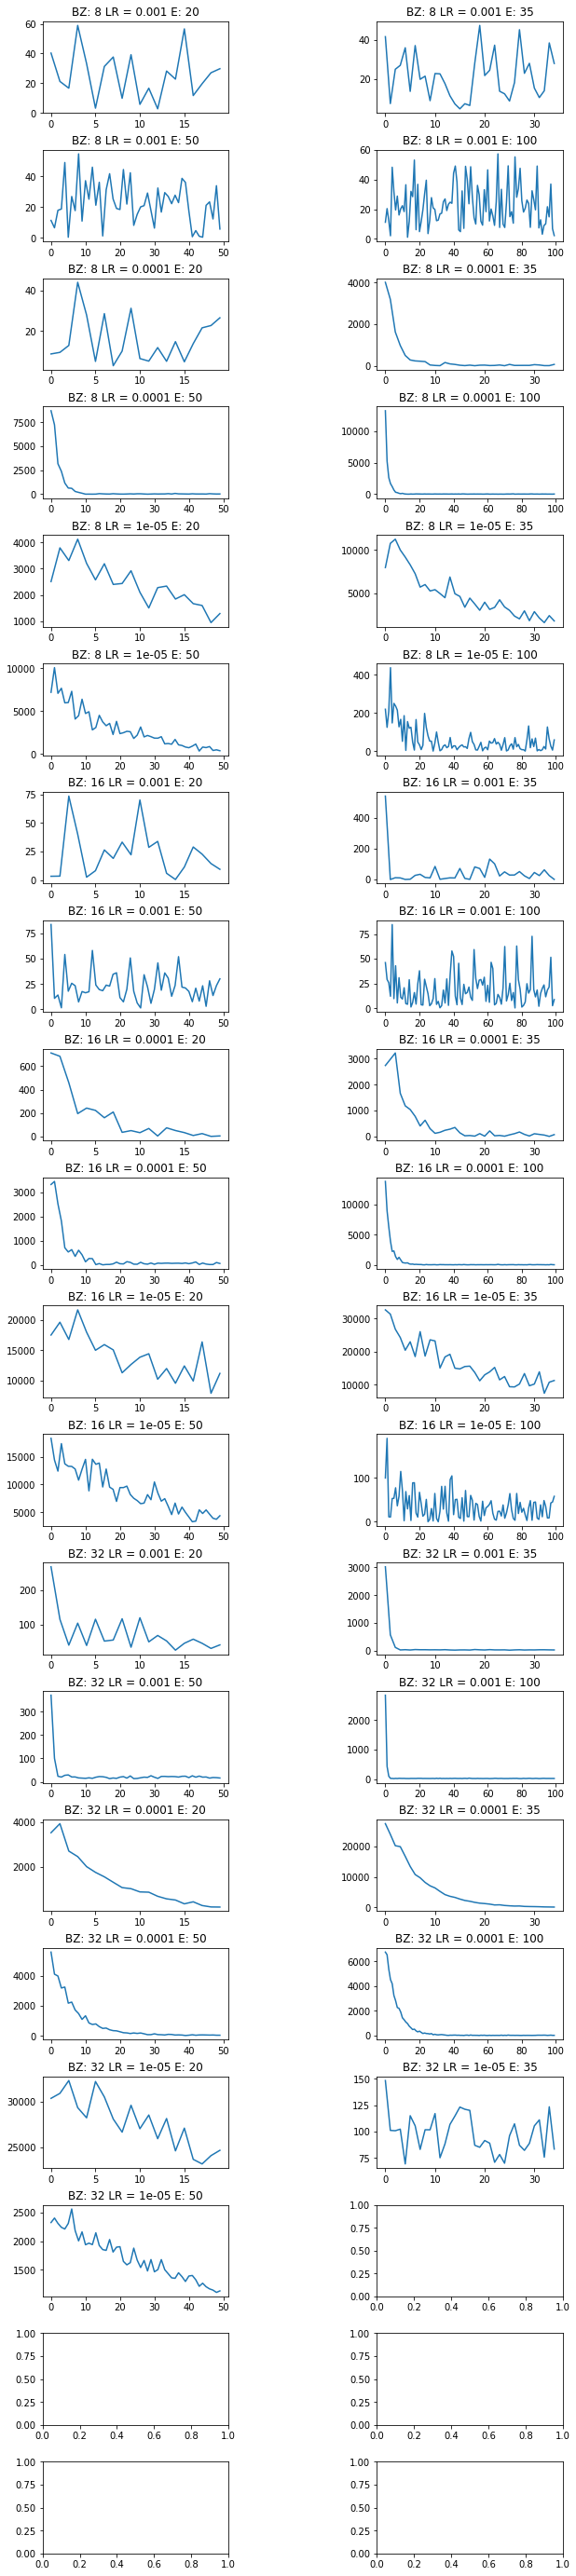

In [18]:


fig, ax = plt.subplots(20,2, figsize = (10,50) )
fig.subplots_adjust(hspace = .4, wspace=.8)
ax = ax.ravel()
for i in range(0,35):
  ax[i].plot(loss_hists[i])
  ax[i].set_title(tittles[i])

### Variando hiperparametros usando medio nivel

In [19]:
loss_hists = [] # En esta lista se guardaran los historiales de perdida para cada caso

for batch_i in batch_sizes:
  print("Usando un batch_size de " + str(batch_i))

  for lr_i in learning_rates:
    print("Usando un learning rate de: " + str(lr_i))
    
    for e_i in epochs:
      print("Usando un valor de épocas: " + str(e_i))

      # Creamos el dataset
      ds = TensorDataset(x_trn, y_trn)

      # Se crea el DataLoader

      dl = DataLoader(ds, batch_size = batch_i, shuffle = True)

      #Entrenamiento

      # historial
      loss_hist = []

      # Modelo
      modelMedio = RegLinMedio()
      
      opt = optim.SGD(modelMedio.parameters(), lr= lr_i)
      for epoch in range(e_i):
        
        # entrenamiento de una época
        for x, y_true in dl:
            # hacemos inferencia para obtener los logits
            y_lgts = modelMedio(x)
            # calculamos de pérdida
            loss = F.mse_loss(y_lgts, y_true)
            # vaciamos los gradientes
            opt.zero_grad()
            # retropropagamos
            loss.backward()
            # actulizamos parámetros
            opt.step()

            # guardamos historial de pérdida
        loss_hist.append(loss.item() * 100)


        loss = np.mean(loss_hist)
        print(f'E{epoch:02} loss=[{loss:6.2f}]')
        
      loss_hists.append(loss_hist)                   
        # imprimimos la pérdida de la época
        
      
      





      
      #print(batch_i,lr_i,e_i)


Usando un batch_size de 8
Usando un learning rate de: 0.001
Usando un valor de épocas: 20
E00 loss=[118.00]
E01 loss=[ 72.22]
E02 loss=[ 49.81]
E03 loss=[ 44.88]
E04 loss=[ 39.88]
E05 loss=[ 33.66]
E06 loss=[ 50.67]
E07 loss=[ 45.72]
E08 loss=[ 42.41]
E09 loss=[ 42.40]
E10 loss=[ 38.74]
E11 loss=[ 35.52]
E12 loss=[ 35.00]
E13 loss=[ 34.52]
E14 loss=[ 32.97]
E15 loss=[ 30.96]
E16 loss=[ 30.87]
E17 loss=[ 30.29]
E18 loss=[ 29.58]
E19 loss=[ 29.72]
Usando un valor de épocas: 35
E00 loss=[ 55.92]
E01 loss=[ 55.02]
E02 loss=[ 51.63]
E03 loss=[ 42.96]
E04 loss=[ 39.25]
E05 loss=[ 37.91]
E06 loss=[ 34.92]
E07 loss=[ 37.13]
E08 loss=[ 40.89]
E09 loss=[ 39.06]
E10 loss=[ 36.06]
E11 loss=[ 38.42]
E12 loss=[ 36.38]
E13 loss=[ 35.07]
E14 loss=[ 32.89]
E15 loss=[ 31.14]
E16 loss=[ 31.12]
E17 loss=[ 32.09]
E18 loss=[ 33.95]
E19 loss=[ 34.62]
E20 loss=[ 35.06]
E21 loss=[ 33.50]
E22 loss=[ 32.90]
E23 loss=[ 31.81]
E24 loss=[ 32.41]
E25 loss=[ 33.49]
E26 loss=[ 33.22]
E27 loss=[ 33.10]
E28 loss=[ 33.85

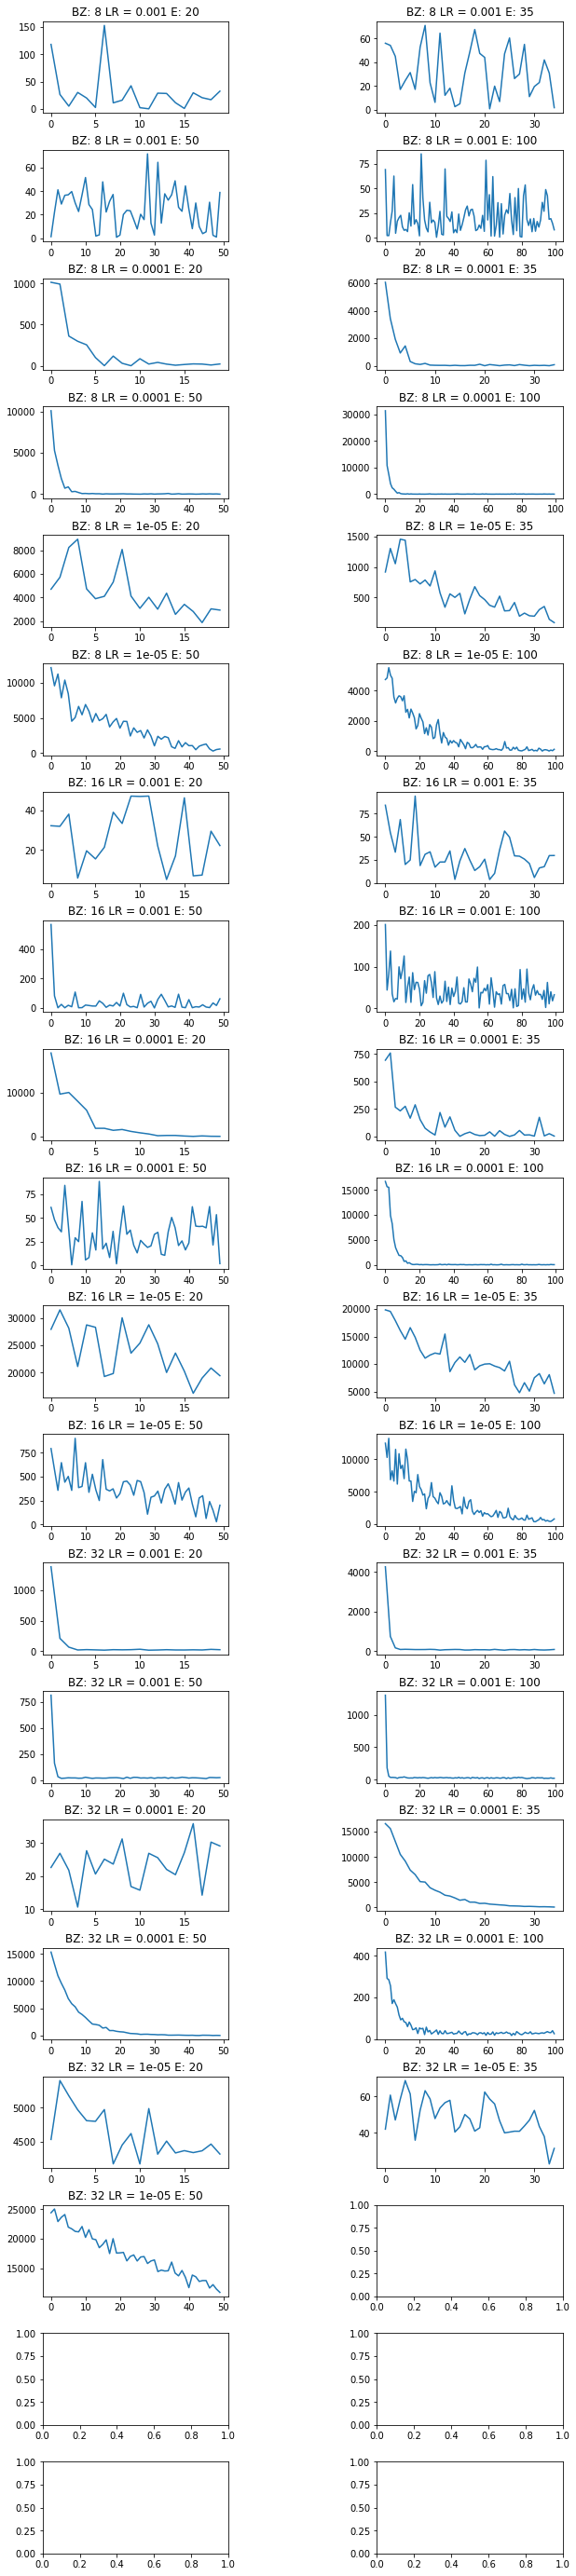

In [20]:
fig, ax = plt.subplots(20,2, figsize = (10,50) )
fig.subplots_adjust(hspace = .4, wspace=.8)
ax = ax.ravel()
for i in range(0,35):
  ax[i].plot(loss_hists[i])
  ax[i].set_title(tittles[i])

#### Realiza una predicción con tu modelo entrenado para la calificación que tendría un alumno si sabemos que estudió durante 12 horas para el examen y en un examen previo obtuvo 3 de calificación.

### Alto Nivel

In [21]:
batch_size = 32

LR = 0.001

E = 100

# creamos un Dataset
ds = TensorDataset(x_trn, y_trn)

# creamos un DataLoader
trn_dl = DataLoader(ds, batch_size= batch_size , shuffle=True)

# Modelo
regLinealAlto = nn.Sequential(
    nn.Linear(2,1)
    )

# optimizador
opt = optim.SGD(regLinealAlto.parameters(), lr= LR)


# ciclo de entrenamiento
for _ in range(E):

    # entrenamiento de una época
    for x, y_true in trn_dl:
        # hacemos inferencia para obtener los logits
        y_lgts = regLinealAlto(x)
        # calculamos de pérdida
        loss = F.mse_loss(y_lgts, y_true)
        # vaciamos los gradientes
        opt.zero_grad()
        # retropropagamos
        loss.backward()
        # actulizamos parámetros
        opt.step()

In [22]:
x_infe = torch.tensor([[3.0, 12.0]])

# deshabilitamos el rastreo de gradientes
with torch.no_grad():
    y_pred = regLinealAlto(x_infe).numpy()
[w, b] = regLinealAlto.parameters()
print("La calificación será:", y_pred[0][0])

La calificación será: 5.9403768


Para este ejercicio seleccionaremos utilizaremos medio nivel

In [23]:
batch_size = 32

LR = 0.001

E = 100

# creamos un Dataset
ds = TensorDataset(x_trn, y_trn)

# creamos un DataLoader
trn_dl = DataLoader(ds, batch_size= batch_size , shuffle=True)

# modelo
modelMedio = RegLinMedio()

# optimizador
opt = optim.SGD(modelMedio.parameters(), lr= LR)


# ciclo de entrenamiento
for _ in range(E):

    # entrenamiento de una época
    for x, y_true in trn_dl:
        # hacemos inferencia para obtener los logits
        y_lgts = modelMedio(x)
        # calculamos de pérdida
        loss = F.mse_loss(y_lgts, y_true)
        # vaciamos los gradientes
        opt.zero_grad()
        # retropropagamos
        loss.backward()
        # actulizamos parámetros
        opt.step()

### Hacemos inferencia

In [24]:
x_infe = torch.tensor([[3.0, 12.0]])

# deshabilitamos el rastreo de gradientes
with torch.no_grad():
    y_pred = modelMedio(x_infe).numpy()
[w, b] = modelMedio.parameters()
print("La calificación será:", y_pred[0][0])

La calificación será: 6.0289598


#### Conclusiones:



* Tanto alto nivel como medio nivel paracen ser consistentes ya que se pueden observar comportamientos similares durantes los entrenamientos utilizando los mismos parámetros. 

* En la variación del batchsize parece funcionar adecuadamente uno de 32, sin embargo los otros valores de batchsize, 8, 16 también parecen fucionar en ciertas ocaciones si se complementan con los otros hiperparametros adecuados.

* El uso de una tasa de aprendizaje alta, como 0.01 hacia que los valores de perdida se dispararan ha valores muy grandes, creo que ese es uno de los principales problemas en la elección de una tasa de aprendizaje adecuada. La tasas de aprendizaje de 0.0001 para este caso parece funcionar de forma adecuada.

* Por ultimo, entrenar durante muy pocas épocas no tiene buenos resultados y conforme van amentando el comportamiento cambia. Cabe mencionar que en algunos casos entrenar durante 20 épocas también da buenos resultados pero depende tabién de los otros hiperparametros.



